## MATH 4388: Machine Learning Methods 


### Chapter 3: Classification

### Overview 

* Evaluating a classifier is more complicated than evaluating a regression model because of categorical labels
    * Unlike regression problems, we cannot use the Euclidean distance between actual and predicted labels 
    * In practice, we have to look at various metrics in the form of a score, matrix, or curve
        + Confusion matrix
        + Precision
        + Recall
        + $F_1$ score
        + Precision/recall curve
        + Receiver Operating Characteristic (ROC) curve 
        
<img src="classifier.png" width=800 height=600>
   

### Binary classification using MNIST 
<hr style="border:2px solid gray">

* MNIST is one of the most popular benchmark data sets in machine learning, which can be accessed via scikit-learn 
    * Thus, it involves minimal to no preprocessing 

* 70,000 images, each labeled with the digit it represents
    * Each image is 28 x 28 pixels, i.e., a 2D array, but stored as a 1D array with 784 features
        + Note that $28^2=784$
    * Each feature shows the intensity of one pixel 
        + The grayscale intensity values between 0 and 255,  corresponding to shades of gray
        + 0 being the lightest (white) and 255 being the darkest (black)

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

mnist.keys()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['data'].shape # 70,000 images in R^784 

(70000, 784)

In [3]:
mnist['target'] # 70,000 labels 

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [4]:
# Identify input features and labels 

X, y = mnist.data, mnist.target

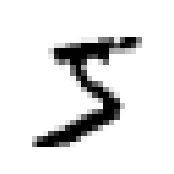

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14, "figure.figsize": (2,2)})

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [6]:
# Let us look at the label of this image and its type

print(y[0],'\n', type(y[0]))

5 
 <class 'str'>


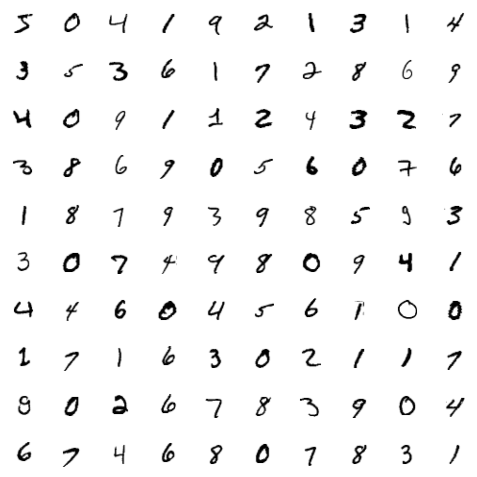

In [7]:
# Plot the first 100 images in this data set 

plt.figure(figsize=(5, 5))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

plt.tight_layout()
plt.show()

In [8]:
# train/test split 

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
# create a binary classification problem (detecting digit 5) 

y_train_5 = (y_train == '5')

y_test_5 = (y_test == '5')

y_train_5[:10] 

array([ True, False, False, False, False, False, False, False, False,
       False])

In [10]:
# We select a classifier and measure its "accuracy" using cross validation 

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# accuracy: the fraction of correct predictions over the total number of samples 
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [11]:
# Let us investigate this "amazing" result more by defining a 
# classifier that always returns False  

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass  # no training 
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # return False for every input image 
    

cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

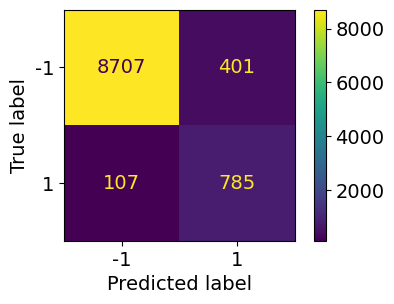

In [12]:
# In this cell, we investigate one of the most popular ways of evaluating classifiers 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train, y_train_5)

y_pred_5 = sgd_clf.predict(X_test)

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

ConfusionMatrixDisplay.from_predictions(y_test_5, y_pred_5, display_labels=np.array([-1,1]))

plt.show()

### Confusion matrix 
<hr style="border:2px solid gray">

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class

    * The first row of this matrix considers non-5 images (negative class)
    * The second row considers the images of 5s (positive class)
    
<center><img src="confusion_matrix.png" width=400 height=400><center>

In [13]:
from sklearn.metrics import precision_score, recall_score

print("Precision: %0.2f" %precision_score(y_test_5, y_pred_5))

print("Recall: %0.2f" %recall_score(y_test_5, y_pred_5))

Precision: 0.66
Recall: 0.88


### Precision and recall
<hr style="border:2px solid gray">

* We can combine precision and recall into a single metric called the $F_1$ score using the harmonic mean
    * A classifier gets a high $F_1$ score if both recall and precision are high 
    
$$F_1=\frac{2}{\frac{1}{\text{pre}}+ \frac{1}{\text{rec}}}=2\times \frac{\text{pre}\times \text{rec}}{\text{pre} + \text{rec}}$$

* Also, we can plot precision/recall values as a function of the threshold used for classification 
    * compute a score based on a *decision function*
    * If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class
        + Raising the threshold will increase the precision score (because we decrease FP)
            + The classifier becomes more conservative in making positive predictions
        + Lowering the threshold will increase the recall score (because we decrease FN)
            + The classifier becomes more conservative in making positive predictions

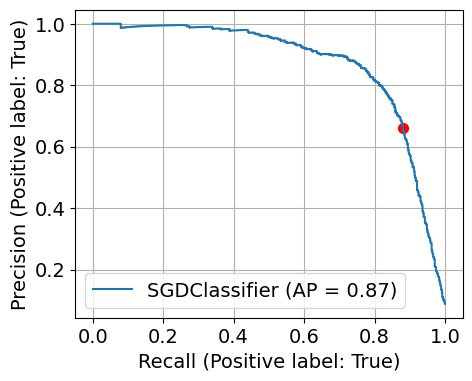

In [14]:
from sklearn.metrics import PrecisionRecallDisplay

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})

# Use the fitted classifier sgd_clf
PrecisionRecallDisplay.from_estimator(sgd_clf, X_test, y_test_5)

# Previous results 
plt.scatter(recall_score(y_test_5, y_pred_5), precision_score(y_test_5, y_pred_5), c = 'r', s=50)

plt.grid()

plt.show()

### ROC Curve
<hr style="border:2px solid gray">

* The ROC curve plots the true positive rate (TPR or recall) against the false positive rate (FPR)
    * We have $\text{FPR} = 1- \text{TNR}$
    
* This means that the top left corner of the plot is the "ideal" point -- a false positive rate of zero, and a true positive rate of one

* In an ROC Curve, the diagonal represents the baseline model/random classifier
    * The closer an ROC curve comes to the 45-degree diagonal of the ROC space, the less powerful is the model
    
* The ROC AUC is the area under the ROC curve
    * It quantifies the overall performance of the classifier across different decision thresholds
    * An AUC-ROC of 1.0 means perfect discrimination, where the classifier has achieved a TPR of 1 and an FPR of 0
    * An AUC-ROC of 0.5 means the classifier is no better than random

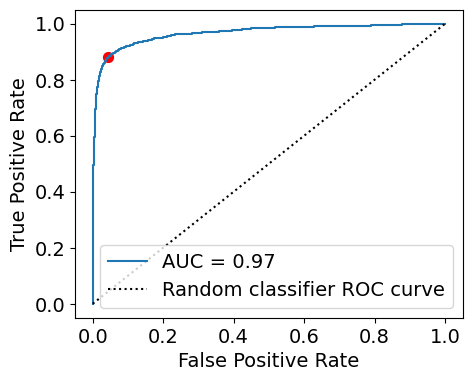

In [15]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import RocCurveDisplay

y_score_5 = sgd_clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test_5, y_score_5)

roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

plt.plot([0, 1], [0, 1], 'k:', label="Random classifier ROC curve")

# Previous results 
plt.scatter(1 - recall_score(y_test_5, y_pred_5, pos_label=False), recall_score(y_test_5, y_pred_5), c = 'r', s=50) 

plt.legend()

plt.show()

### Theoretical analysis 
<hr style="border:2px solid gray">

* Assume there is a fraction $x$ of positive cases and a fraction $1-x$ of negative cases

* Assume that the classifier consists of randomly assigning the positive class with probability $\rho$ (we will vary this from 0 to 1)

* Under these two assumptions:
    $$\text{TP}=xN\rho, \text{FN}=xN(1-\rho), \text{TN}=(1-x)N(1-\rho), \text{FP}=(1-x)N\rho$$
    
* Hence, we get 

$$\text{TPR}=\frac{\text{TP}}{\text{TP}+\text{FN}}=\frac{xN\rho}{xN\rho+xN(1-\rho)}=\rho$$

$$\text{FPR}=\frac{\text{FP}}{\text{FP}+\text{TN}}=\frac{(1-x)N\rho}{(1-x)N(1-\rho)+(1-x)N\rho}=\rho$$


### Multiclass Classification
<hr style="border:2px solid gray">

* Multiclass classification is a machine learning task where the goal is to assign input samples to one of multiple possible classes
* There are two common strategies to extend binary classification algorithms to handle multiclass problems
    * One-vs-Rest (OvR)
        + For each class, a separate binary classifier is trained to distinguish that class from all the other classes combined
        + In a multiclass problem with $C$ classes, you will have $C$ binary classifiers
    * One-vs-One (OvO)
        + A binary classifier is trained for every possible pair of classes
        + If you have C classes, you will have ${C \choose 2}=\frac{C(C-1)}{2}$ binary classifiers
        
* If there are $C$ classes, the confusion matrix will be a square matrix of size $C \times C$
    * Each row of the confusion matrix corresponds to the instances in a true class
    * Each column corresponds to the instances in a predicted class



In [16]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train[:10000], y_train[:10000]) # y_train not y_train_5 (thus, 10 classes)

SGDClassifier(random_state=42)

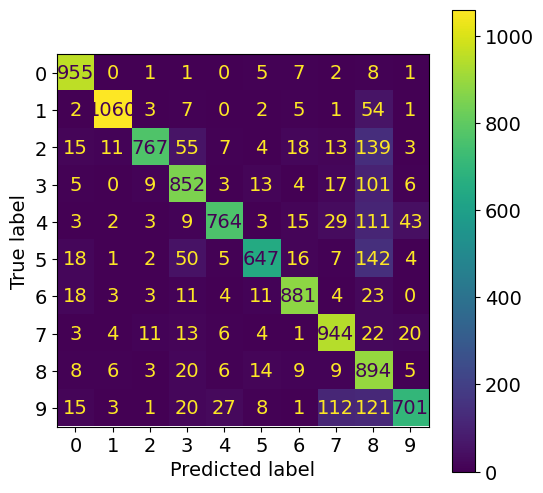

In [17]:
plt.rcParams.update({'font.size': 14, "figure.figsize": (6,6)})

y_test_pred = sgd_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)